In [17]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from collections import defaultdict
from matplotlib.colors import rgb2hex, colorConverter
import sys
from datetime import datetime
from time import mktime, strptime

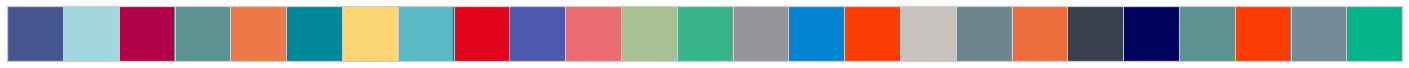

In [18]:
many = ["#485690","#a2d7dd", "#b00149","#5c9291","#ee7948","#008899","#fcd575","#59b9c6", "#e2041b","#4d5aaf","#ec6d71","#a8bf93","#38b48b","#95949a","#0485d1","#fd3c06","#c8c2be","#6c848d","#ed6d3d","#393f4c","#00035b","#5c9291","#fd3c06","#748b97","#06b48b"]
sns.palplot(sns.color_palette(many))


In [19]:
outprefix1 = "Spike_charge_to_15Jun22"
dfComp_unique = pd.read_csv('Spike_charge_to_15Jun22_unique.csv', sep=",",index_col='Genome', na_values=['-'])
dfComp_unique.head()

,charge,genome_id,Sample_date,Year_month,Lineage,Country
Genome,,,,,,
hCoV-19/Wuhan/WIV04/2019|EPI_ISL_402124|2019-12-30|China|B,-8.28,hCoV-19/Wuhan/WIV04/2019|EPI_ISL_402124|2019-1...,2019-12-30,2019-12,B,Wuhan
hCoV-19/USA/FL-BPHL-1866/2020|EPI_ISL_613944|2020-04-09|NorthAmerica|A.3,-8.28,hCoV-19/USA/FL-BPHL-1866/2020|EPI_ISL_613944|2...,2020-04-09,2020-04,A.3,USA
hCoV-19/USA/CT-Yale-120/2020|EPI_ISL_431084|2020-04-11|NorthAmerica|B.1,-7.28,hCoV-19/USA/CT-Yale-120/2020|EPI_ISL_431084|20...,2020-04-11,2020-04,B.1,USA
hCoV-19/England/SHEF-C086E/2020|EPI_ISL_420163|2020-03-25|Europe|B.15,-8.28,hCoV-19/England/SHEF-C086E/2020|EPI_ISL_420163...,2020-03-25,2020-03,B.15,England
hCoV-19/Italy/CAM-TIGEM-588/2020|EPI_ISL_778666|2020-04-14|Europe|B.1,-7.28,hCoV-19/Italy/CAM-TIGEM-588/2020|EPI_ISL_77866...,2020-04-14,2020-04,B.1,Italy


In [20]:
print(len(dfComp_unique.index))

6500696


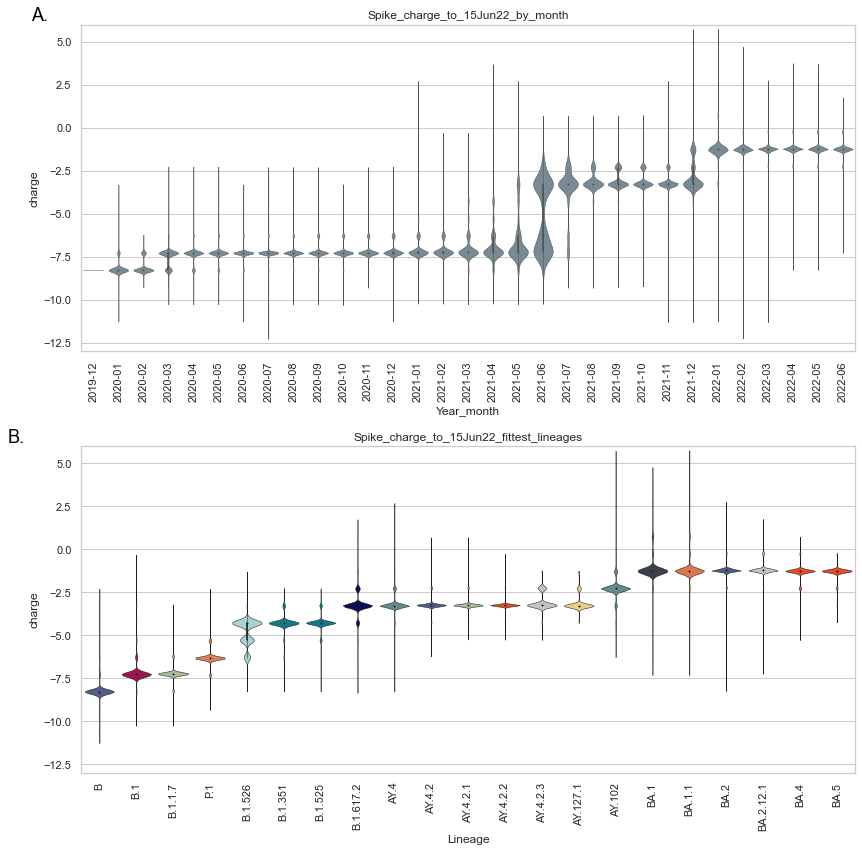

In [21]:
#combine time and lineage plots
sns.set(style="whitegrid")

fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.4, wspace=0.8)

ax = fig.add_subplot(2, 1, 1)
this_order1 =['2019-12','2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02','2022-03','2022-04','2022-05','2022-06']

ax = sns.violinplot(data=dfComp_unique, x="Year_month", y="charge", color = "#748b97", dodge=False, linewidth = 0.5, cut=0, order = this_order1, scale='width', bw=0.25)
# ax.legend_.remove()
ax.set_title(outprefix1+"_by_month")
ax.set_ylim(-13, 6)
plt.xticks(rotation=90)
#add letter for figure panel
ax.text(-2.5, 6, "A.", fontsize=18, va="bottom", color="#0d0015", rotation=0)


ax = fig.add_subplot(2, 1, 2)
#10 fittest lineage plus early version (from Obermayer) plus recent most abundant Omicron lineages
this_order2 =['B','B.1','B.1.1.7','P.1','B.1.526','B.1.351','B.1.525','B.1.617.2','AY.4','AY.4.2','AY.4.2.1','AY.4.2.2','AY.4.2.3','AY.127.1','AY.102','BA.1','BA.1.1','BA.2','BA.2.12.1','BA.4','BA.5']
ax = sns.violinplot(data=dfComp_unique, x="Lineage", y="charge", hue="Lineage", palette=many, dodge=False, linewidth = 0.5, order = this_order2, cut=0, scale='width', bw=0.25)
ax.legend_.remove()
ax.set_title(outprefix1+"_fittest_lineages")
ax.set_ylim(-13, 6)
plt.xticks(rotation=90)
ax.text(-2.5, 6, "B.", fontsize=18, va="bottom", color="#0d0015", rotation=0)

plt.tight_layout()
plt.savefig(outprefix1+'_spike_total_charge_violin_plot_by_month_and_fittest.pdf',bbox_inches="tight") #bbox_inches="tight" important avoids cutoff
plt.savefig(outprefix1+'_spike_total_charge_violin_plot_by_month_and_fittest.jpg',bbox_inches="tight", dpi = 300) #bbox_inches="tight" important avoids cutoff

